#### Basic Analysis

In [1]:
from typing import Optional
import pandas as pd
import timeit
import tracemalloc

Elapsed time: -0.0009387469999637688
first_size=20855731, first_peak=21016063


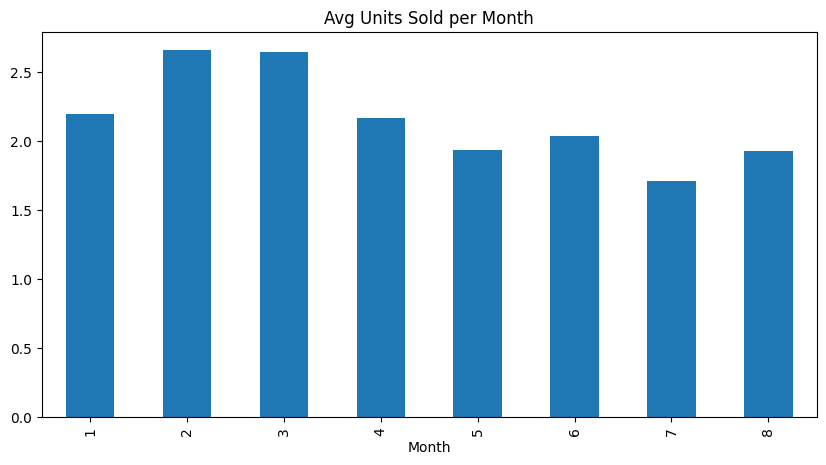

In [2]:
# Set up memory trace
tracemalloc.clear_traces()
tracemalloc.start()

# Data cleaning
start = timeit.timeit()
df = pd.read_csv('csv/Online Sales Data.csv')
df = df.drop_duplicates()
df = df.dropna()
df.reset_index(drop=True)

# Convert types
df['Product Category'] = df['Product Category'].astype('str')
df['Product Name'] = df['Product Name'].astype('str')
df['Date'] = pd.to_datetime(df['Date'])

# Data analysis
df['Month'] = df['Date'].dt.month
new_df = df.groupby('Month')['Units Sold'].mean()

# Data visualisation
new_df.plot(kind='bar', figsize=(10, 5), title='Avg Units Sold per Month')
new_df.to_csv('output/trad_output.csv')
end = timeit.timeit()
print(f'Elapsed time: {end-start}')

# Get memory stats
first_size, first_peak = tracemalloc.get_traced_memory()
print(f"{first_size=}, {first_peak=}")
tracemalloc.stop()
tracemalloc.clear_traces()

#### Basic Analysis with Pipeline

Elapsed time: -0.0005987540007481584
first_size=682215, first_peak=840617


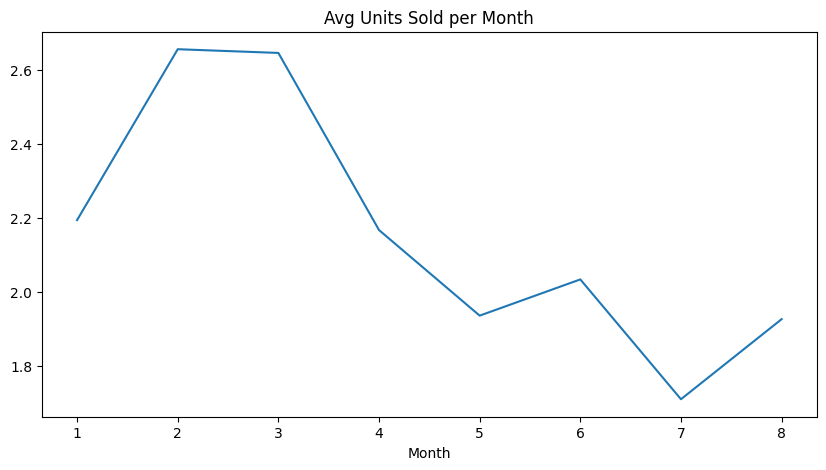

In [3]:
def load_data(path: str) -> pd.DataFrame:
    return pd.read_csv(path)

def data_cleaning(data: pd.DataFrame) -> pd.DataFrame:
    data = data.drop_duplicates()
    data = data.dropna()
    data = data.reset_index(drop=True)
    return data

def convert_dtypes(data: pd.DataFrame, types_dict: dict = {}) -> pd.DataFrame:
    data = data.astype(dtype=types_dict)
    data['Date'] = pd.to_datetime(data['Date'])
    return data

def data_analysis(data: pd.DataFrame) -> pd.DataFrame:
    data['Month'] = data['Date'].dt.month
    new_df = data.groupby('Month')['Units Sold'].mean()
    return new_df

def data_viz(new_df: pd.DataFrame, vis_type: str = 'bar') -> pd.DataFrame:
    new_df.plot(kind=vis_type, figsize=(10,5), title='Avg Units Sold per Month')
    return new_df

def data_write(new_df: pd.DataFrame):
    new_df.to_csv('output/piped_output.csv')


# Set up memory trace
tracemalloc.clear_traces()
tracemalloc.start()

# Run pipeline
start = timeit.timeit()
path = 'csv/Online Sales Data.csv'
df = (pd.DataFrame()
      .pipe(lambda x: load_data(path))
      .pipe(data_cleaning)
      .pipe(convert_dtypes, {'Product Category': 'str',
                             'Product Name': 'str'})
      .pipe(data_analysis)
      .pipe(data_viz, 'line')
      .pipe(data_write))
end = timeit.timeit()
print(f'Elapsed time: {end-start}')

# Get memory stats
first_size, first_peak = tracemalloc.get_traced_memory()
print(f"{first_size=}, {first_peak=}")
tracemalloc.stop()
tracemalloc.clear_traces()

#### Basic Pipeline with OOP

Elapsed time: -0.0003804790012509329
first_size=594980, first_peak=868129


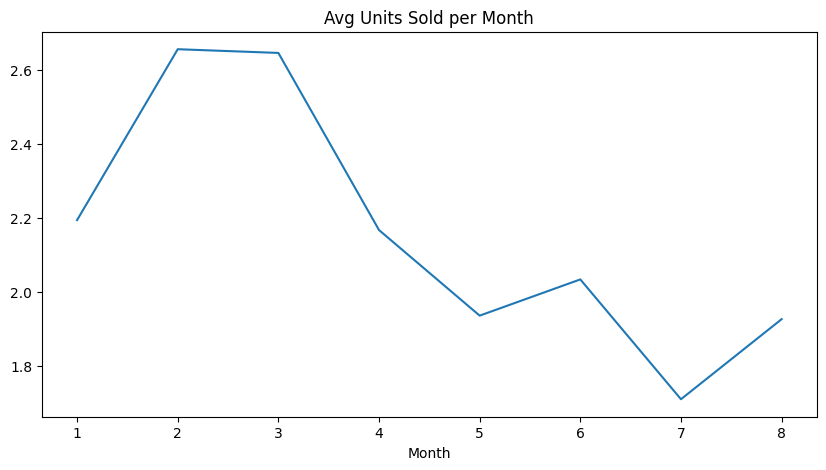

In [4]:
# Be aware of inheritence issues for __annotations__ (uses base class defs)
class DataPipeline():
    def __init__(self, path: str, dtype_dict: dict = {}, viz_type: str = 'bar'):
        self.path: str = path
        self.dtype_dict: dict = dtype_dict
        self.raw_df: pd.DataFrame = pd.DataFrame
        self.cleaned_df: pd.DataFrame = pd.DataFrame
        self.converted_df: pd.DataFrame = pd.DataFrame
        self.summarise_df: pd.DataFrame = pd.DataFrame
        self.viz_df: pd.DataFrame = pd.DataFrame
        self.viz_type: str = viz_type
        
    def data_load(self):
        self.raw_df = pd.read_csv(self.path)

    def data_clean(self):
        self.cleaned_df = self.raw_df.drop_duplicates()
        self.cleaned_df= self.cleaned_df.dropna()
        self.cleaned_df = self.cleaned_df.reset_index(drop=True)

    def data_conv_dtypes(self):
        self.converted_df = self.cleaned_df.astype(dtype=self.dtype_dict)
        self.converted_df['Date'] = pd.to_datetime(self.converted_df['Date'])
        self.converted_df['Month'] = self.converted_df['Date'].dt.month

    def data_summarise(self):
        self.summarise_df = self.converted_df.groupby('Month')['Units Sold'].mean()
        
    def data_viz(self):
        self.summarise_df.plot(kind=self.viz_type, figsize=(10,5), title='Avg Units Sold per Month')
        
    def data_write(self):
        self.summarise_df.to_csv('output/full_oop_ouput.csv')

    def exec_pipeline(self):
        self.data_load()
        self.data_clean()
        self.data_conv_dtypes()
        self.data_summarise()
        self.data_viz()
        self.data_write()


# Set up memory trace
tracemalloc.clear_traces()
tracemalloc.start()

# Run pipeline
start = timeit.timeit()
path = 'csv/Online Sales Data.csv'
conv_dtypes = {'Product Category': 'str', 'Product Name': 'str'}
pipeline = DataPipeline(path, conv_dtypes, 'line')
pipeline.exec_pipeline()
end = timeit.timeit()
print(f'Elapsed time: {end-start}')
del pipeline

# Get memory stats
first_size, first_peak = tracemalloc.get_traced_memory()
print(f"{first_size=}, {first_peak=}")
tracemalloc.stop()
tracemalloc.clear_traces()

Elapsed time: -0.0004818759989575483
first_size=589819, first_peak=748913


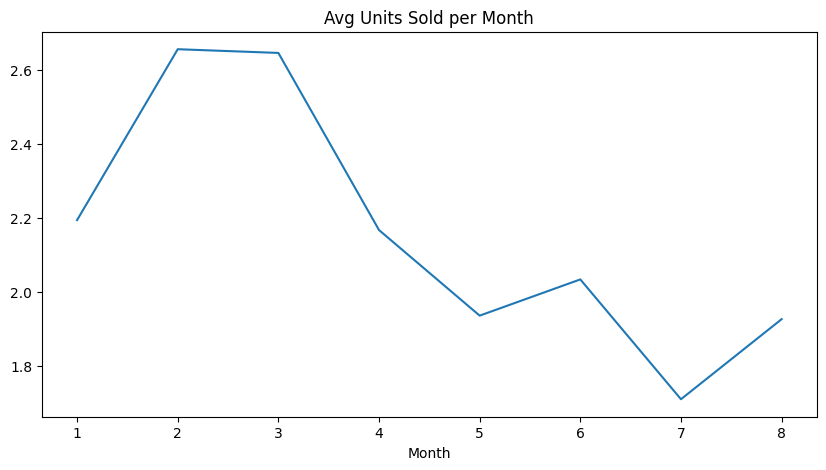

In [5]:
class DataPipeline():
    def __init__(self, path: str, dtype_dict: dict = {}, viz_type: str = 'bar'):
        self.path: str = path
        self.conv_dtype: dict = dtype_dict
        self.df: pd.DataFrame = pd.DataFrame
        self.viz_type: str = viz_type
        
    def data_load(self):
        self.df = pd.read_csv(self.path)

    def data_clean(self):
        self.df = (self.df
                   .drop_duplicates()
                   .dropna()
                   .reset_index(drop=True))

    def data_conv_dtypes(self):
        self.df = self.df.astype(dtype=self.conv_dtype)
        self.df['Date'] = pd.to_datetime(self.df['Date'])
        self.df['Month'] = self.df['Date'].dt.month

    def data_summarise(self):
        self.df = self.df.groupby('Month')['Units Sold'].mean()
        
    def data_viz(self):
        self.df.plot(kind=self.viz_type, figsize=(10,5), title='Avg Units Sold per Month')

    def data_write(self):
        self.df.to_csv('output/slim_oop_output.csv')
        
    def exec_pipeline(self):
        self.data_load()
        self.data_clean()
        self.data_conv_dtypes()
        self.data_summarise()
        self.data_viz()
        self.data_write()


# Set up memory trace
tracemalloc.clear_traces()
tracemalloc.start()

# Run pipeline
start = timeit.timeit()
path = 'csv/Online Sales Data.csv'
conv_dtypes = {'Product Category': 'str', 'Product Name': 'str'}
pipeline = DataPipeline(path, conv_dtypes, 'line')
pipeline.exec_pipeline()
end = timeit.timeit()
print(f'Elapsed time: {end-start}')
del pipeline

# Get memory stats
first_size, first_peak = tracemalloc.get_traced_memory()
print(f"{first_size=}, {first_peak=}")
tracemalloc.stop()
tracemalloc.clear_traces()

#### Notes

- Logging
- Check data type (isinstance(data['field'], int))
- Separate test module